In [14]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([2.3,3.1,4.5,4.7,5.2,6.3,6.8,7.1])
y = np.array([0,0,0,0,0,1,1,1])

In [15]:
def logistic_gradient_descent(x,y,learning_rate,num_iterations):
  m = len(y)
  w = np.array([0.0,0.0], dtype = float)
  losses = []
  for i in range(num_iterations):
    z_pred = w[0] + w[1]*x
    y_pred = 1/(1+np.exp(-z_pred))
    err = y_pred - y
    loss = -1/m*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
    losses.append(loss)
    w[0] = w[0] - learning_rate*(1/m)*np.sum(err)
    w[1] = w[1] - learning_rate*(1/m)*np.sum(err*x)
  return w, losses

In [16]:
w, loss = logistic_gradient_descent(x,y,0.2,1000)

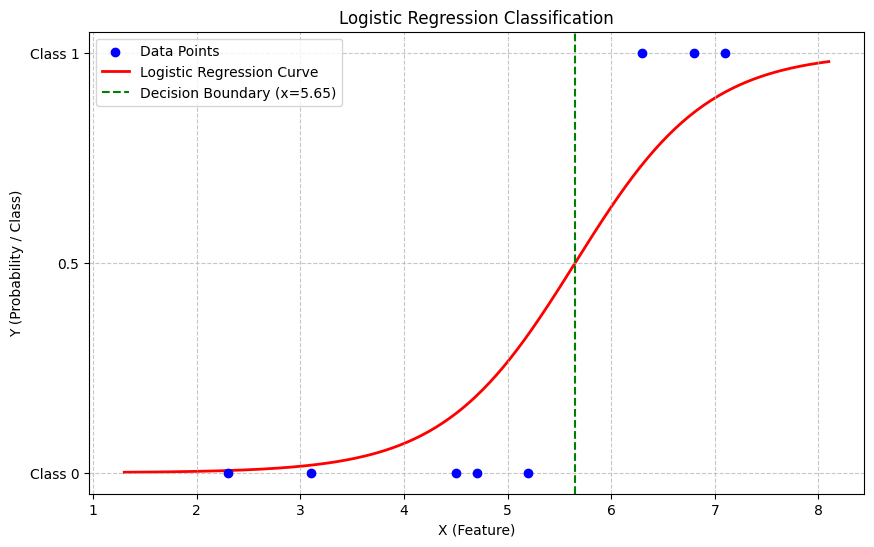

In [17]:
# Range of x values for the logistic regression curve
x_range = np.linspace(x.min() - 1, x.max() + 1, 300)

# Calculate the predicted probabilities using the learned weights
z_pred_curve = w[0] + w[1] * x_range
y_pred_curve = 1 / (1 + np.exp(-z_pred_curve))

plt.figure(figsize=(10, 6))

# Plot the original data points
plt.scatter(x, y, color='blue', label='Data Points', zorder=2)

# Plot the logistic regression curve
plt.plot(x_range, y_pred_curve, color='red', label='Logistic Regression Curve', linewidth=2, zorder=1)

# Add a decision boundary at y = 0.5
# The decision boundary is where w[0] + w[1]*x = 0, so x = -w[0]/w[1]
decision_boundary_x = -w[0] / w[1]
plt.axvline(x=decision_boundary_x, color='green', linestyle='--', label=f'Decision Boundary (x={decision_boundary_x:.2f})')

plt.title('Logistic Regression Classification')
plt.xlabel('X (Feature)')
plt.ylabel('Y (Probability / Class)')
plt.yticks([0, 0.5, 1], ['Class 0', '0.5', 'Class 1'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

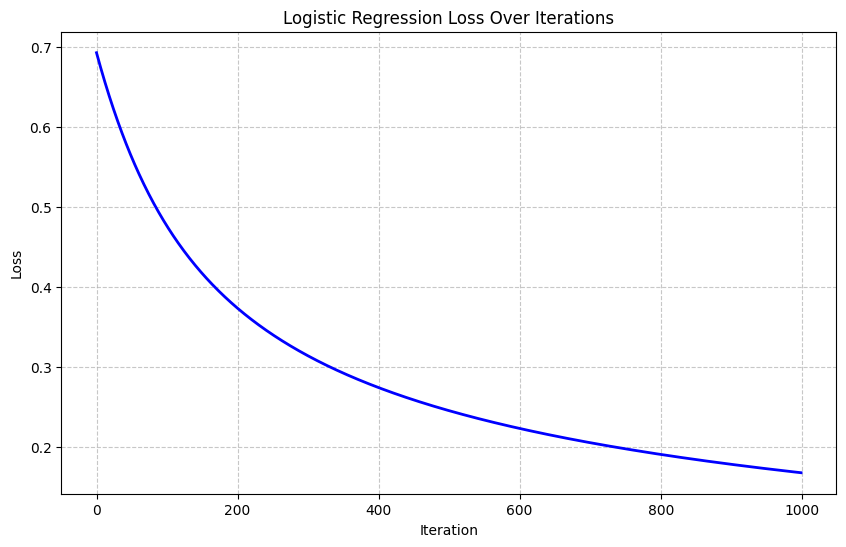

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(loss, color='blue', linewidth=2)
plt.title('Logistic Regression Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()